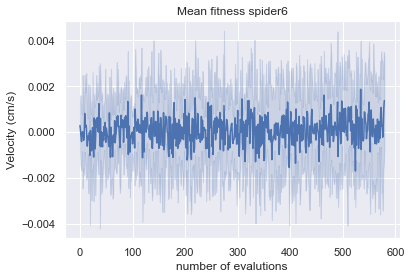

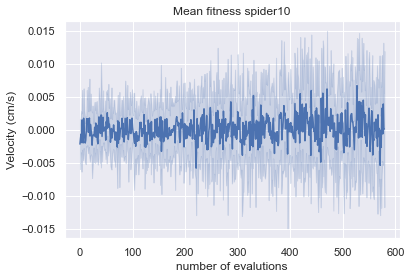

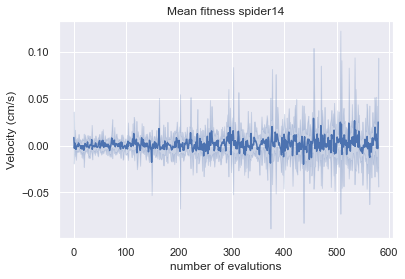

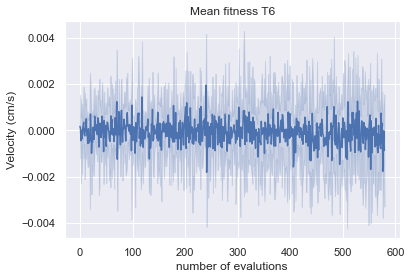

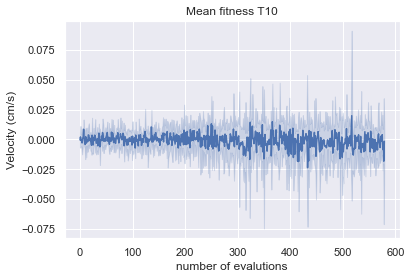

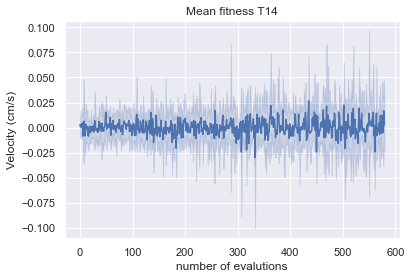

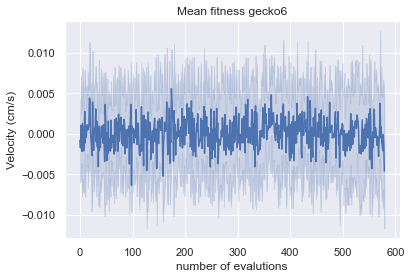

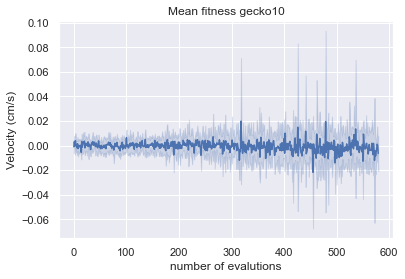

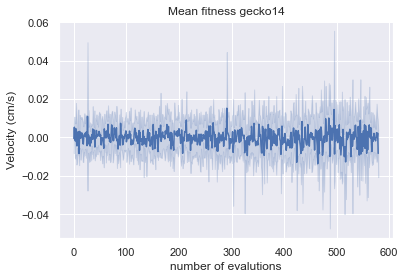

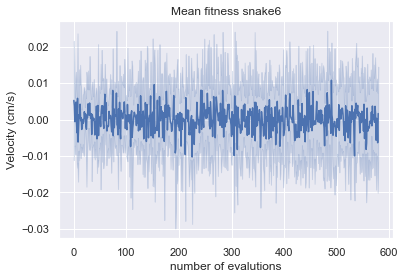

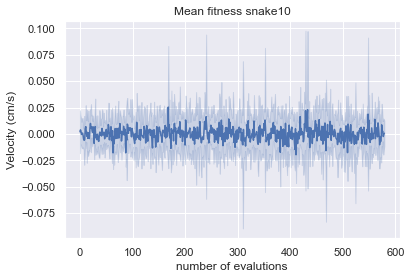

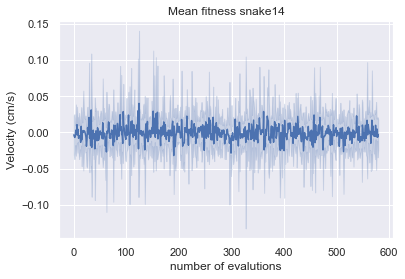

In [3]:
import pandas as pd
import seaborn as sns
import copy
import matplotlib.pyplot as plt

def plot_mean_fitness(morphologie):
    for experiment in range(1, 11): # loop over experiments
        df = pd.read_csv(f'data_rotation/PPO/{morphologie}/database{experiment}/fitnesses.csv')
        df["experiment"] = experiment
        if experiment == 1:
            df_total = df.copy(deep=True)
        else: 
            df_total = pd.concat([df_total, df])  # concat dataframes
    df2= copy.deepcopy(df_total)
    df2['fitness'] = df2['fitness']/30  # transform fitness to cm/s
    sns.set_theme(style="darkgrid")

    # Plot the responses for different events and regions
    ax = sns.lineplot(data=df2, x="individual_id", y="fitness", ci="sd")
    ax.set(xlabel='number of evalutions',
       ylabel='Velocity (cm/s)',
       title= (f'Mean fitness {morphologie}'))
    #ax.set(ylim=(0, 32))
    fig = ax.get_figure()
    #fig.savefig(f"mean_fitness_{morphologie}.png")
    return plt.show()

morphologies = ['spider6', 'spider10' , 'spider14', 'T6', 'T10', 'T14', 'gecko6', 'gecko10', 'gecko14', 'snake6', 'snake10', 'snake14']
for morphologie in morphologies:
    plot_mean_fitness(morphologie)
    

[Text(0.5, 1.0, 'Mean best fitness rotation(ω/s)')]

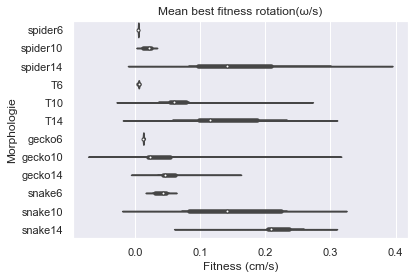

In [5]:
import numpy as np
def mean_variance_best_fitness():  # store best fitnesses in table
    morphologies = ['spider6', 'spider10' , 'spider14', 'T6', 'T10', 'T14', 'gecko6', 'gecko10', 'gecko14', 'snake6', 'snake10', 'snake14']    
    for morphologie in morphologies:
        
        for experiment in range(1, 11): 
            dfp = pd.read_csv(f'data_rotation/PPO/{morphologie}/database{experiment}/fitnesses.csv')
            
            dfp = dfp[dfp['fitness'] == dfp['fitness'].max()] # find best fitness
            dfp["Experiment"] = experiment
            dfp["Morphologie"] = morphologie
            if experiment ==1 and morphologie =='spider6':
                df = dfp
            else:
                df = pd.concat([df, dfp]) # concat
    df['fitness'] = df['fitness']/30  # transform fitness to cm/s
    return df 

# plot mean best fitness for each
df_mbf = mean_variance_best_fitness()
df_mbf.rename(columns={"fitness": "Fitness"}, inplace=True)
g = sns.violinplot(
    data=df_mbf, kind="bar",
    x="Fitness", y="Morphologie", alpha=.6, height=6
)
g.set_ylabel("Morphologie")
g.set_xlabel("Fitness (cm/s)")
sns.set(rc={'figure.figsize':(10.7,9.27)})
g.set(title='Mean best fitness rotation(ω/s)') 

[Text(0.5, 1.0, 'Mean variance rotation(ω/s)')]

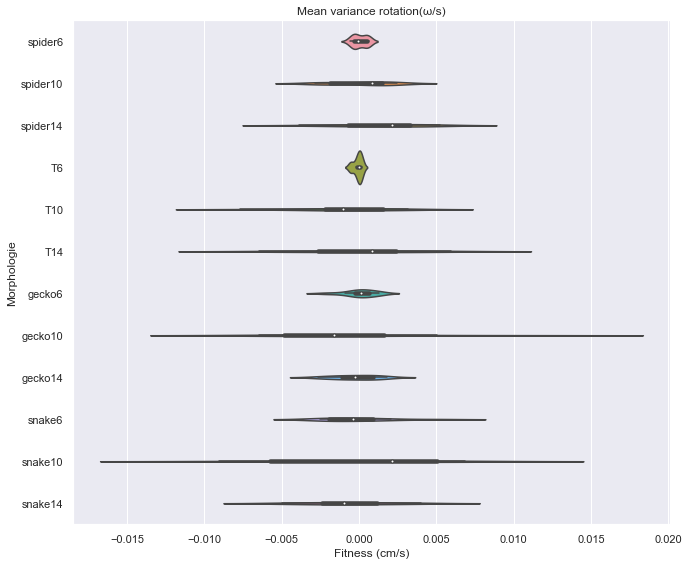

In [6]:
import numpy as np
def mean_variance_efficiency():  # store mean fitnesses in table
    morphologies = ['spider6', 'spider10' , 'spider14', 'T6', 'T10', 'T14', 'gecko6', 'gecko10', 'gecko14', 'snake6', 'snake10', 'snake14']    
    for morphologie in morphologies:
        
        for experiment in range(1, 11): 
            dfp = pd.read_csv(f'data_rotation/PPO/{morphologie}/database{experiment}/fitnesses.csv')
            dfp['fitness'] = dfp['fitness'].mean() # find mean fitness
            dfp = dfp.iloc[0:1]
            dfp["Experiment"] = experiment
            dfp["Morphologie"] = morphologie
            if experiment ==1 and morphologie =='spider6':
                df = dfp
            else:
                df = pd.concat([df, dfp]) # concat
    df['fitness'] = df['fitness']/30  # transform fitness to omega/s
    return df 

# plot mean average fitness (area under fitness curve devided by runs = mean fitness) a measure for efficiency
df_eff = mean_variance_efficiency()

df_eff.rename(columns={"fitness": "Fitness"}, inplace=True)
g = sns.violinplot(
    data=df_eff, kind="bar",
    x="Fitness", y="Morphologie", alpha=.6, height=6
)
g.set_ylabel("Morphologie")
g.set_xlabel("Fitness (cm/s)")
sns.set(rc={'figure.figsize':(10.7,9.27)})
g.set(title='Mean variance rotation(ω/s)') 


In [4]:

# add size and shape column
def add_shape_size(df):
    
    df['Size'] = "i" # initiate size column
    for x in df['Morphologie']:
        if str("6") in str(x):
            df.loc[df['Morphologie'] == x,["Size"]] = '6'
        elif str("10") in str(x):
            df.loc[df['Morphologie'] == x,["Size"]] = '10'
        elif str("14") in str(x):
            df.loc[df['Morphologie'] == x,["Size"]] = '14'

    df['Shape'] = "i" # initiate shape column
    for x in df['Morphologie']:
        if str("snake") in str(x):
            df.loc[df['Morphologie'] == x,["Shape"]] = "snake"
        elif str("T") in str(x):
            df.loc[df['Morphologie'] == x,["Shape"]] = "T"
        elif str("gecko") in str(x):
            df.loc[df['Morphologie'] == x,["Shape"]] = "gecko"
        elif str("spider") in str(x):
            df.loc[df['Morphologie'] == x,["Shape"]] = "spider"
    return df

df_mbf = add_shape_size(df_mbf)
df_eff = add_shape_size(df_eff)



In [5]:
df_mbf['Fitness'].aggregate('std')

0.07948478590269033

In [6]:
df_eff['Fitness'].aggregate('std')

0.0031499248499689742

In [7]:
# Perform a  shapiro Test to check normality on mbf

import pingouin as pg
pg.normality(df_mbf, dv='Fitness', group='Morphologie', method='shapiro').round(3)

,W,pval,normal
spider6,0.860,0.077,True
spider10,0.818,0.024,False
spider14,0.860,0.077,True
T6,0.955,0.732,True
T10,0.729,0.002,False
T14,0.925,0.399,True
gecko6,0.753,0.004,False
gecko10,0.667,0.000,False
gecko14,0.729,0.002,False
snake6,0.899,0.214,True


In [8]:
# Perform a  shapiro Test to check normality on efficiency

import pingouin as pg
pg.normality(df_eff, dv='Fitness', group='Morphologie', method='shapiro').round(3)

,W,pval,normal
spider6,0.889,0.166,True
spider10,0.883,0.143,True
spider14,0.946,0.617,True
T6,0.858,0.072,True
T10,0.939,0.546,True
T14,0.957,0.755,True
gecko6,0.932,0.473,True
gecko10,0.907,0.259,True
gecko14,0.962,0.811,True
snake6,0.895,0.191,True


In [9]:
# Bartlett's test in Python to check equality in variance:
pg.homoscedasticity(df_mbf, dv='Fitness', 
                    group='Morphologie',
                   method='bartlett')

,T,pval,equal_var
bartlett,267.991894,4.721457e-51,False


In [10]:
pg.homoscedasticity(df_eff, dv='Fitness', 
                    group='Morphologie',
                   method='bartlett')

,T,pval,equal_var
bartlett,103.899725,3.007835e-17,False


In [11]:
# --> no normality, equal in variance, kruskal wallis test 
from pingouin import kruskal
kruskal(data=df_mbf, dv='Fitness', between='Morphologie')

,Source,ddof1,H,p-unc
Kruskal,Morphologie,11,102.636033,5.360820e-17


In [12]:
kruskal(data=df_eff, dv='Fitness', between='Morphologie')

,Source,ddof1,H,p-unc
Kruskal,Morphologie,11,5.939174,0.877392


In [13]:
# --> p < 0.05, for efficacy thus significant difference between groups

In [14]:
# now check for size groups
pg.homoscedasticity(df_mbf, dv='Fitness', 
                    group='Size',
                   method='bartlett')

,T,pval,equal_var
bartlett,77.595229,1.413872e-17,False


In [15]:
pg.homoscedasticity(df_eff, dv='Fitness', 
                    group='Size',
                   method='bartlett')

,T,pval,equal_var
bartlett,48.70964,2.647500e-11,False


In [16]:
pg.normality(df_mbf, dv='Fitness', group='Size', method='shapiro').round(3)

,W,pval,normal
6,0.734,0.000,False
10,0.782,0.000,False
14,0.922,0.009,False


In [17]:
pg.normality(df_eff, dv='Fitness', group='Size', method='shapiro').round(3)

,W,pval,normal
6,0.856,0.000,False
10,0.986,0.904,True
14,0.988,0.943,True


In [18]:
#kruskal wallis test, because non equality of variance and non normal
kruskal(data=df_mbf, dv='Fitness', between='Size')


,Source,ddof1,H,p-unc
Kruskal,Size,2,67.755165,1.937103e-15


In [19]:
kruskal(data=df_eff, dv='Fitness', between='Size')

,Source,ddof1,H,p-unc
Kruskal,Size,2,0.673884,0.71395


In [20]:
# --> significant difference between size groups on efficacy

In [21]:
# now do for the shape groups
pg.normality(df_mbf, dv='Fitness', group='Shape', method='shapiro').round(3)

,W,pval,normal
spider,0.719,0.000,False
T,0.860,0.001,False
gecko,0.676,0.000,False
snake,0.836,0.000,False


In [22]:
pg.normality(df_eff, dv='Fitness', group='Shape', method='shapiro').round(3)

,W,pval,normal
spider,0.977,0.749,True
T,0.957,0.252,True
gecko,0.868,0.002,False
snake,0.977,0.741,True


In [23]:
pg.homoscedasticity(df_mbf, dv='Fitness', 
                    group='Shape',
                   method='bartlett')

,T,pval,equal_var
bartlett,9.887593,0.019546,False


In [24]:
pg.homoscedasticity(df_eff, dv='Fitness', 
                    group='Shape',
                   method='bartlett')

,T,pval,equal_var
bartlett,11.511822,0.009257,False


In [25]:
kruskal(data=df_mbf, dv='Fitness', between='Shape')
# significant difference between shapes

,Source,ddof1,H,p-unc
Kruskal,Shape,3,23.820882,0.000027


In [26]:
kruskal(data=df_eff, dv='Fitness', between='Shape')
# significant difference between shapes

,Source,ddof1,H,p-unc
Kruskal,Shape,3,2.141763,0.54351


In [31]:
# efficacy: save mean and standard dev as csv

df_morphologie = df_mbf.groupby(['Morphologie']).agg(['mean','var'])['Fitness'] # group by morphologie and aggregate
df_size = df_mbf.groupby(['Size']).agg(['mean','var'])['Fitness'] # group by size and aggregate
df_shape = df_mbf.groupby(['Shape']).agg(['mean','var'])['Fitness'] # group by size and aggregate


df_morphologie.to_csv('mbf_rot_morphologie.csv')
df_size.to_csv('mbf_rot_size.csv')
df_shape.to_csv('mbf_rot_shape.csv')

C:\Users\marti\AppData\Local\Temp\ipykernel_29976\1507089050.py:3: FutureWarning: ['Size', 'Shape'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_morphologie = df_mbf.groupby(['Morphologie']).agg(['mean','var'])['Fitness'] # group by morphologie and aggregate
C:\Users\marti\AppData\Local\Temp\ipykernel_29976\1507089050.py:4: FutureWarning: ['Morphologie', 'Shape'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_size = df_mbf.groupby(['Size']).agg(['mean','var'])['Fitness'] # group by size and aggregate
C:\Users\marti\AppData\Local\Temp\ipykernel_29976\1507089050.py:5: FutureWarning: ['Morphologie', 'Size'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_shape = df_mbf.groupb

In [30]:
# efficiency: save mean and standard dev as csv

df_morphologie = df_eff.groupby(['Morphologie']).agg(['mean','var'])['Fitness'] # group by morphologie and aggregate
df_size = df_eff.groupby(['Size']).agg(['mean','var'])['Fitness'] # group by size and aggregate
df_shape = df_eff.groupby(['Shape']).agg(['mean','var'])['Fitness'] # group by size and aggregate


df_morphologie.to_csv('eff_rot_morphologie.csv')
df_size.to_csv('eff_rot_size.csv')
df_shape.to_csv('eff_rot_shape.csv')

C:\Users\marti\AppData\Local\Temp\ipykernel_29976\1620173817.py:3: FutureWarning: ['Size', 'Shape'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_morphologie = df_eff.groupby(['Morphologie']).agg(['mean','var'])['Fitness'] # group by morphologie and aggregate
C:\Users\marti\AppData\Local\Temp\ipykernel_29976\1620173817.py:4: FutureWarning: ['Morphologie', 'Shape'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_size = df_eff.groupby(['Size']).agg(['mean','var'])['Fitness'] # group by size and aggregate
C:\Users\marti\AppData\Local\Temp\ipykernel_29976\1620173817.py:5: FutureWarning: ['Morphologie', 'Size'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_shape = df_eff.groupb

In [45]:
df_mbf['Fitness'].aggregate('std')

0.07948478590269033

In [46]:
df_mbf['Fitness'].aggregate('mean')

0.07816524838062812

In [ ]:
####################### POST HOC ANALYSIS

In [ ]:
################## MBF

In [42]:
# check if snake14 is significantly bigger spider14
pg.mwu(df_mbf[df_mbf["Morphologie"]=='snake14']['Fitness'], df_mbf[df_mbf["Morphologie"]=='spider14']['Fitness'], alternative='greater')

,U-val,alternative,p-val,RBC,CLES
MWU,76.0,greater,0.026951,-0.52,0.76


In [43]:
# check if T6 is significantly bigger spider6
pg.mwu(df_mbf[df_mbf["Morphologie"]=='T6']['Fitness'], df_mbf[df_mbf["Morphologie"]=='spider6']['Fitness'], alternative='greater')

,U-val,alternative,p-val,RBC,CLES
MWU,82.0,greater,0.008629,-0.64,0.82


In [39]:
# # check if shape snake is significantly bigger then T
pg.mwu(df_mbf[df_mbf["Shape"]=='snake']['Fitness'], df_mbf[df_mbf["Shape"]=='T']['Fitness'], alternative='greater')

,U-val,alternative,p-val,RBC,CLES
MWU,629.0,greater,0.004157,-0.397778,0.698889


In [40]:
# check if size 10 is significantly bigger then 14
pg.mwu(df_mbf[df_mbf["Size"]=='10']['Fitness'], df_mbf[df_mbf["Size"]=='14']['Fitness'], alternative='greater')

,U-val,alternative,p-val,RBC,CLES
MWU,381.0,greater,0.999973,0.52375,0.238125


In [41]:
# check if size 14 is significantly bigger then 6
pg.mwu(df_mbf[df_mbf["Size"]=='14']['Fitness'], df_mbf[df_mbf["Size"]=='6']['Fitness'], alternative='greater')

,U-val,alternative,p-val,RBC,CLES
MWU,1571.0,greater,6.120841e-14,-0.96375,0.981875


In [44]:
# check if size 10 is significantly bigger then 6
pg.mwu(df_mbf[df_mbf["Size"]=='10']['Fitness'], df_mbf[df_mbf["Size"]=='6']['Fitness'], alternative='greater')

,U-val,alternative,p-val,RBC,CLES
MWU,1384.0,greater,9.843392e-09,-0.73,0.865
